## eBay Car Sales

Author: Julian Moors\
Contact: julian.moors@outlook.com

### Introduction
_In this project we'll work with a dataset of used cars from eBay Kleinanzeigen, a classified section of the German eBay website._

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

autos = pd.read_csv('data/ebay-car-sales.csv', encoding='latin1')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

### Data Dictionary

| Name                | Description                                       |
|---------------------|---------------------------------------------------|
| dateCrawled         | The date when the ad was first posted             |
| name                | The manufacturer of the car                       |
| seller              | The type of seller (private or not)               |
| offerType           | The type of ad                                    |
| price               | The amount in USD                                 |
| abtest              | Whether or not the ad was involved in an A/B test |
| vehicleType         | The type of vehicle                               |
| yearOfRegistration  | The year when the car was first available         |
| gearbox             | The type of gearbox (transmission)                |
| powerPS             | The amount of power of the vehicle in PS          |
| model               | The vehicle model                                 |
| odometer            | The distance the car has travelled (km)           |
| monthOfRegistration | The month when the car was first available        |
| fuelType            | The type of fuel                                  |
| brand               | The brand name of the car                         |
| notRepairedDamage   | Whether the card has any outstanding repairs      |
| dateCreated         | The date when the ad was created                  |
| nrOfPictures        | The number of pictures of the car in the ad       |
| postalCode          | The postcode the seller is located                |
| lastSeen            | The last time the crawler trawled the ad          |

### Data Cleaning
_Identify any outliers from low unique count of any column._

In [17]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


_Reformat headers in snake case and drop outliers._

In [18]:
autos.columns = ['crawled_date', 'name', 'seller', 'offer_type', 'price', 'ab_test', 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km', 'registration_month', 'fuel_type', 'brand', 'damage_repaired', 'created_date', 'pictures', 'postal_code', 'last_seen']
autos_new = autos[['crawled_date', 'name', 'price', 'vehicle_type', 'registration_year', 'power_ps', 'model', 'odometer_km', 'registration_month', 'fuel_type', 'brand', 'created_date', 'postal_code', 'last_seen']]

In [19]:
autos_new

,crawled_date,name,price,vehicle_type,registration_year,power_ps,model,odometer_km,registration_month,fuel_type,brand,created_date,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,480,NaN,1993,0,golf,150000,0,benzin,volkswagen,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,coupe,2011,190,NaN,125000,5,diesel,audi,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,163,grand,125000,8,diesel,jeep,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,69,fabia,90000,7,diesel,skoda,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,0,NaN,20000,1,NaN,sonstige_autos,2016-03-14 00:00:00,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,101,fortwo,125000,3,benzin,smart,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,102,transporter,150000,3,diesel,volkswagen,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,100,golf,150000,6,diesel,volkswagen,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


_Remove the dollar sign ($) from **price** and distance measurement (km) from **odometer_km** and convert to numeric data type._

In [20]:
autos_new_copy = autos_new.copy()
autos_new_copy['price'] = autos_new_copy['price'].astype(str)
autos_new_copy['price'] = autos_new_copy['price'].str.replace(r'^\$', '', regex=True)
autos_new_copy['price'] = autos_new_copy['price'].str.replace(',', '').astype(np.int64)
autos_new_copy['price'] = pd.to_numeric(autos_new_copy['price'], errors='coerce').fillna(0)
autos_new_copy = autos_new_copy.dropna(subset=['price'])
autos_new = autos_new_copy

In [21]:
autos_new_copy = autos_new.copy()
autos_new_copy['odometer_km'] = autos_new_copy['odometer_km'].astype(str)
autos_new_copy['odometer_km'] = autos_new_copy['odometer_km'].str.replace('km', '')
autos_new_copy['odometer_km'] = autos_new_copy['odometer_km'].str.replace(',', '').astype(np.int64)
autos_new_copy['odometer_km'] = pd.to_numeric(autos_new_copy['odometer_km'], errors='coerce').fillna(0)
autos_new_copy = autos_new_copy.dropna(subset=['odometer_km'])
autos_new = autos_new_copy

_Reformat all date columns._

In [22]:
autos_new['crawled_date'] = autos_new['crawled_date'].str[:10]
autos_new['created_date'] = autos_new['created_date'].str[:10]
autos_new['last_seen'] = autos_new['last_seen'].str[:10]

In [23]:
autos_new

,crawled_date,name,price,vehicle_type,registration_year,power_ps,model,odometer_km,registration_month,fuel_type,brand,created_date,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,480,NaN,1993,0,golf,150000,0,benzin,volkswagen,2016-03-24,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupe,2011,190,NaN,125000,5,diesel,audi,2016-03-24,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,163,grand,125000,8,diesel,jeep,2016-03-14,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,2016-03-17,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,69,fabia,90000,7,diesel,skoda,2016-03-31,60437,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,0,NaN,20000,1,NaN,sonstige_autos,2016-03-14,39576,2016-04-06
371524,2016-03-05,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,101,fortwo,125000,3,benzin,smart,2016-03-05,26135,2016-03-11
371525,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,102,transporter,150000,3,diesel,volkswagen,2016-03-19,87439,2016-04-07
371526,2016-03-20,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,100,golf,150000,6,diesel,volkswagen,2016-03-20,40764,2016-03-24


_Remove all rows that fall out of reasonable boundaries for the **registration_year** and **price** data points._

In [24]:
boolean_filter = (autos_new['registration_year'] > 1900) & (autos_new['registration_year'] < 2016)
registration_year = autos_new['registration_year']
autos_new['registration_year'] = registration_year[boolean_filter]

In [25]:
brand = autos_new['brand']
brand_counts = brand.value_counts()

manufacturers = autos_new['brand'].value_counts().index
autos_new = autos_new[(autos_new['price'] >= 350) & (autos_new['price'] < 3890000)]

boolean_filter = autos_new['brand'].isin(manufacturers)
filtered_prices = autos_new[boolean_filter].sort_values(by='price', ascending=False)

In [26]:
autos_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345125 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   crawled_date        345125 non-null  object 
 1   name                345125 non-null  object 
 2   price               345125 non-null  int64  
 3   vehicle_type        315571 non-null  object 
 4   registration_year   323556 non-null  float64
 5   power_ps            345125 non-null  int64  
 6   model               328730 non-null  object 
 7   odometer_km         345125 non-null  int64  
 8   registration_month  345125 non-null  int64  
 9   fuel_type           319438 non-null  object 
 10  brand               345125 non-null  object 
 11  created_date        345125 non-null  object 
 12  postal_code         345125 non-null  int64  
 13  last_seen           345125 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 39.5+ MB


### Data Visualisation
_Filter dataset to keep **price** in a realistic range and arrange cars based on average price and chart the results showing ascending first._

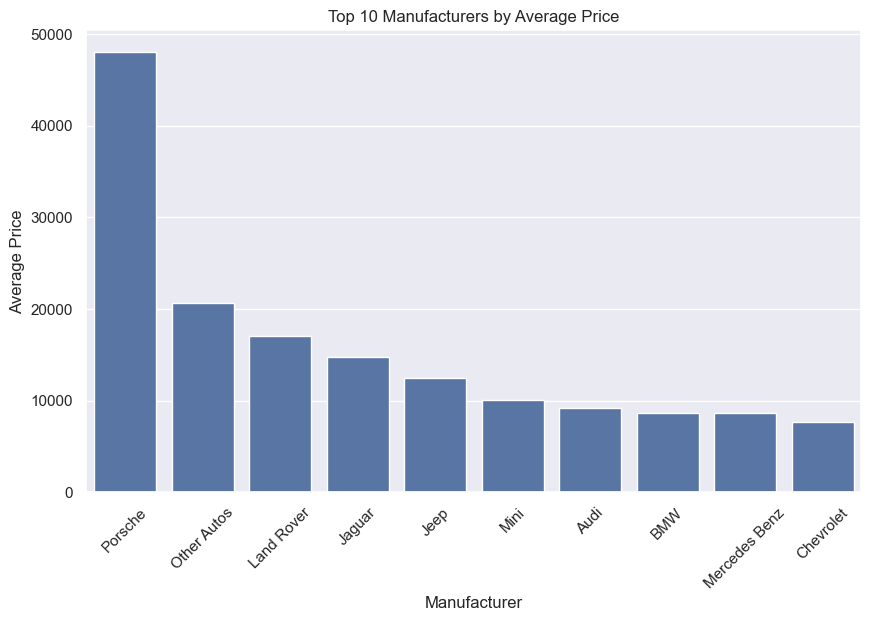

In [27]:
filtered_data = autos_new[(autos_new['price'] >= 350) & (autos_new['price'] < 3890000)]
avg_price_per_manufacturer = filtered_data.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

formatted_labels = [label.replace('_', ' ').title() if label != 'sonstige_autos' else 'Other Autos' for label in avg_price_per_manufacturer.index]
formatted_labels = ['BMW' if label == 'Bmw' else label for label in formatted_labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=formatted_labels, y=avg_price_per_manufacturer.values)
plt.xticks(rotation=45)
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.title('Top 10 Manufacturers by Average Price')
plt.show()

### Conclusion
_The charted results reflect a common understanding of the car market in that the average price of a car will be higher with high performance engines. In order to gain a better understanding of customer trends a datapoint could be added that keeps track of how many times a particular car model has been sold._